# Data Visualization With The Golden State Warriors

### Exploring Pandas, Matplotlib, and Seaborn functionality by creating various data visualizations of shooting stats of the Golden State Warriors

First let's import all of the libraries we need and change the current working directory to the folder that contains the stats we web scraped

In [ ]:
import csv, os
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

os.chdir('Stats')

And now let's create all the dataframes that will hold all of the data that we scraped

In [ ]:
gsw_overall_df =  pd.read_csv('gsw_overall_stats.csv')
gsw_5ft_df = pd.read_csv('gsw_5ft_stats.csv')
gsw_8ft_df = pd.read_csv('gsw_8ft_stats.csv')
gsw_shot_area_df = pd.read_csv('gsw_shot_area_stats.csv')
gsw_assisted_shot_df = pd.read_csv('gsw_assisted_shot_stats.csv')
gsw_shot_type_df = pd.read_csv('gsw_shot_type_stats.csv')
gsw_assisted_by_df = pd.read_csv('gsw_assisted_by_stats.csv')

Since basketball is a team sport, let's start with the "Assisted By" stats. This statline tells you how many times the designated player assisted for a made basket. Because assists only occur for made baskets, everyone's FG% in this statline will be 1.0

In [14]:
gsw_assisted_by_df

,GROUP_SET,PLAYER_ID,PLAYER_NAME,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,...,EFG_PCT_RANK,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,CFID,CFPARAMS
0,Assisted By,2440,"Barnes, Matt",45,45,1.0,13,13,1.0,1.144,...,14,1,1,1,1,1,1,1,168,2440
1,Assisted By,203546,"Clark, Ian",90,90,1.0,27,27,1.0,1.150,...,12,1,1,1,1,1,1,1,168,203546
2,Assisted By,201939,"Curry, Stephen",524,524,1.0,163,163,1.0,1.156,...,11,1,1,1,1,1,1,1,168,201939
3,Assisted By,201142,"Durant, Kevin",300,300,1.0,130,130,1.0,1.217,...,3,1,1,1,1,1,1,1,168,201142
4,Assisted By,203110,"Green, Draymond",533,533,1.0,182,182,1.0,1.171,...,7,1,1,1,1,1,1,1,168,203110
5,Assisted By,2738,"Iguodala, Andre",261,261,1.0,85,85,1.0,1.163,...,9,1,1,1,1,1,1,1,168,2738
6,Assisted By,2733,"Livingston, Shaun",139,139,1.0,41,41,1.0,1.147,...,13,1,1,1,1,1,1,1,168,2733
7,Assisted By,1626172,"Looney, Kevon",29,29,1.0,13,13,1.0,1.224,...,2,1,1,1,1,1,1,1,168,1626172
8,Assisted By,203949,"McAdoo, James Michael",18,18,1.0,6,6,1.0,1.167,...,8,1,1,1,1,1,1,1,168,203949
9,Assisted By,1627775,"McCaw, Patrick",77,77,1.0,30,30,1.0,1.195,...,6,1,1,1,1,1,1,1,168,1627775


Let's extract the most important pieces of data here namely, the players' names, total Field Goals Made (FGM), and the 3 pointers made (FG3M). Notice that we can get the total number of 2 pointers made by subtracting FGM and FG3M

In [15]:
test_assisted_by_df = gsw_assisted_by_df[['PLAYER_NAME','FGM','FG3M']]
test_assisted_by_df = test_assisted_by_df.assign(FG2M = test_assisted_by_df.FGM - test_assisted_by_df.FG3M)
test_assisted_by_df_sorted = test_assisted_by_df.sort_values(by= 'FGM',ascending=False)
test_assisted_by_df_sorted

,PLAYER_NAME,FGM,FG3M,FG2M
4,"Green, Draymond",533,182,351
2,"Curry, Stephen",524,163,361
3,"Durant, Kevin",300,130,170
5,"Iguodala, Andre",261,85,176
12,"Thompson, Klay",160,45,115
15,"West, David",151,28,123
6,"Livingston, Shaun",139,41,98
11,"Pachulia, Zaza",132,42,90
1,"Clark, Ian",90,27,63
9,"McCaw, Patrick",77,30,47


In [40]:
test_assisted_by_df_sorted.describe()

,FGM,FG3M,FG2M
count,16.000000,16.000000,16.000000
mean,155.687500,51.187500,104.500000
std,169.656012,57.865613,113.276652
min,5.000000,3.000000,2.000000
25%,26.250000,11.500000,15.000000
50%,111.000000,29.000000,76.500000
75%,185.250000,55.000000,134.750000
max,533.000000,182.000000,361.000000


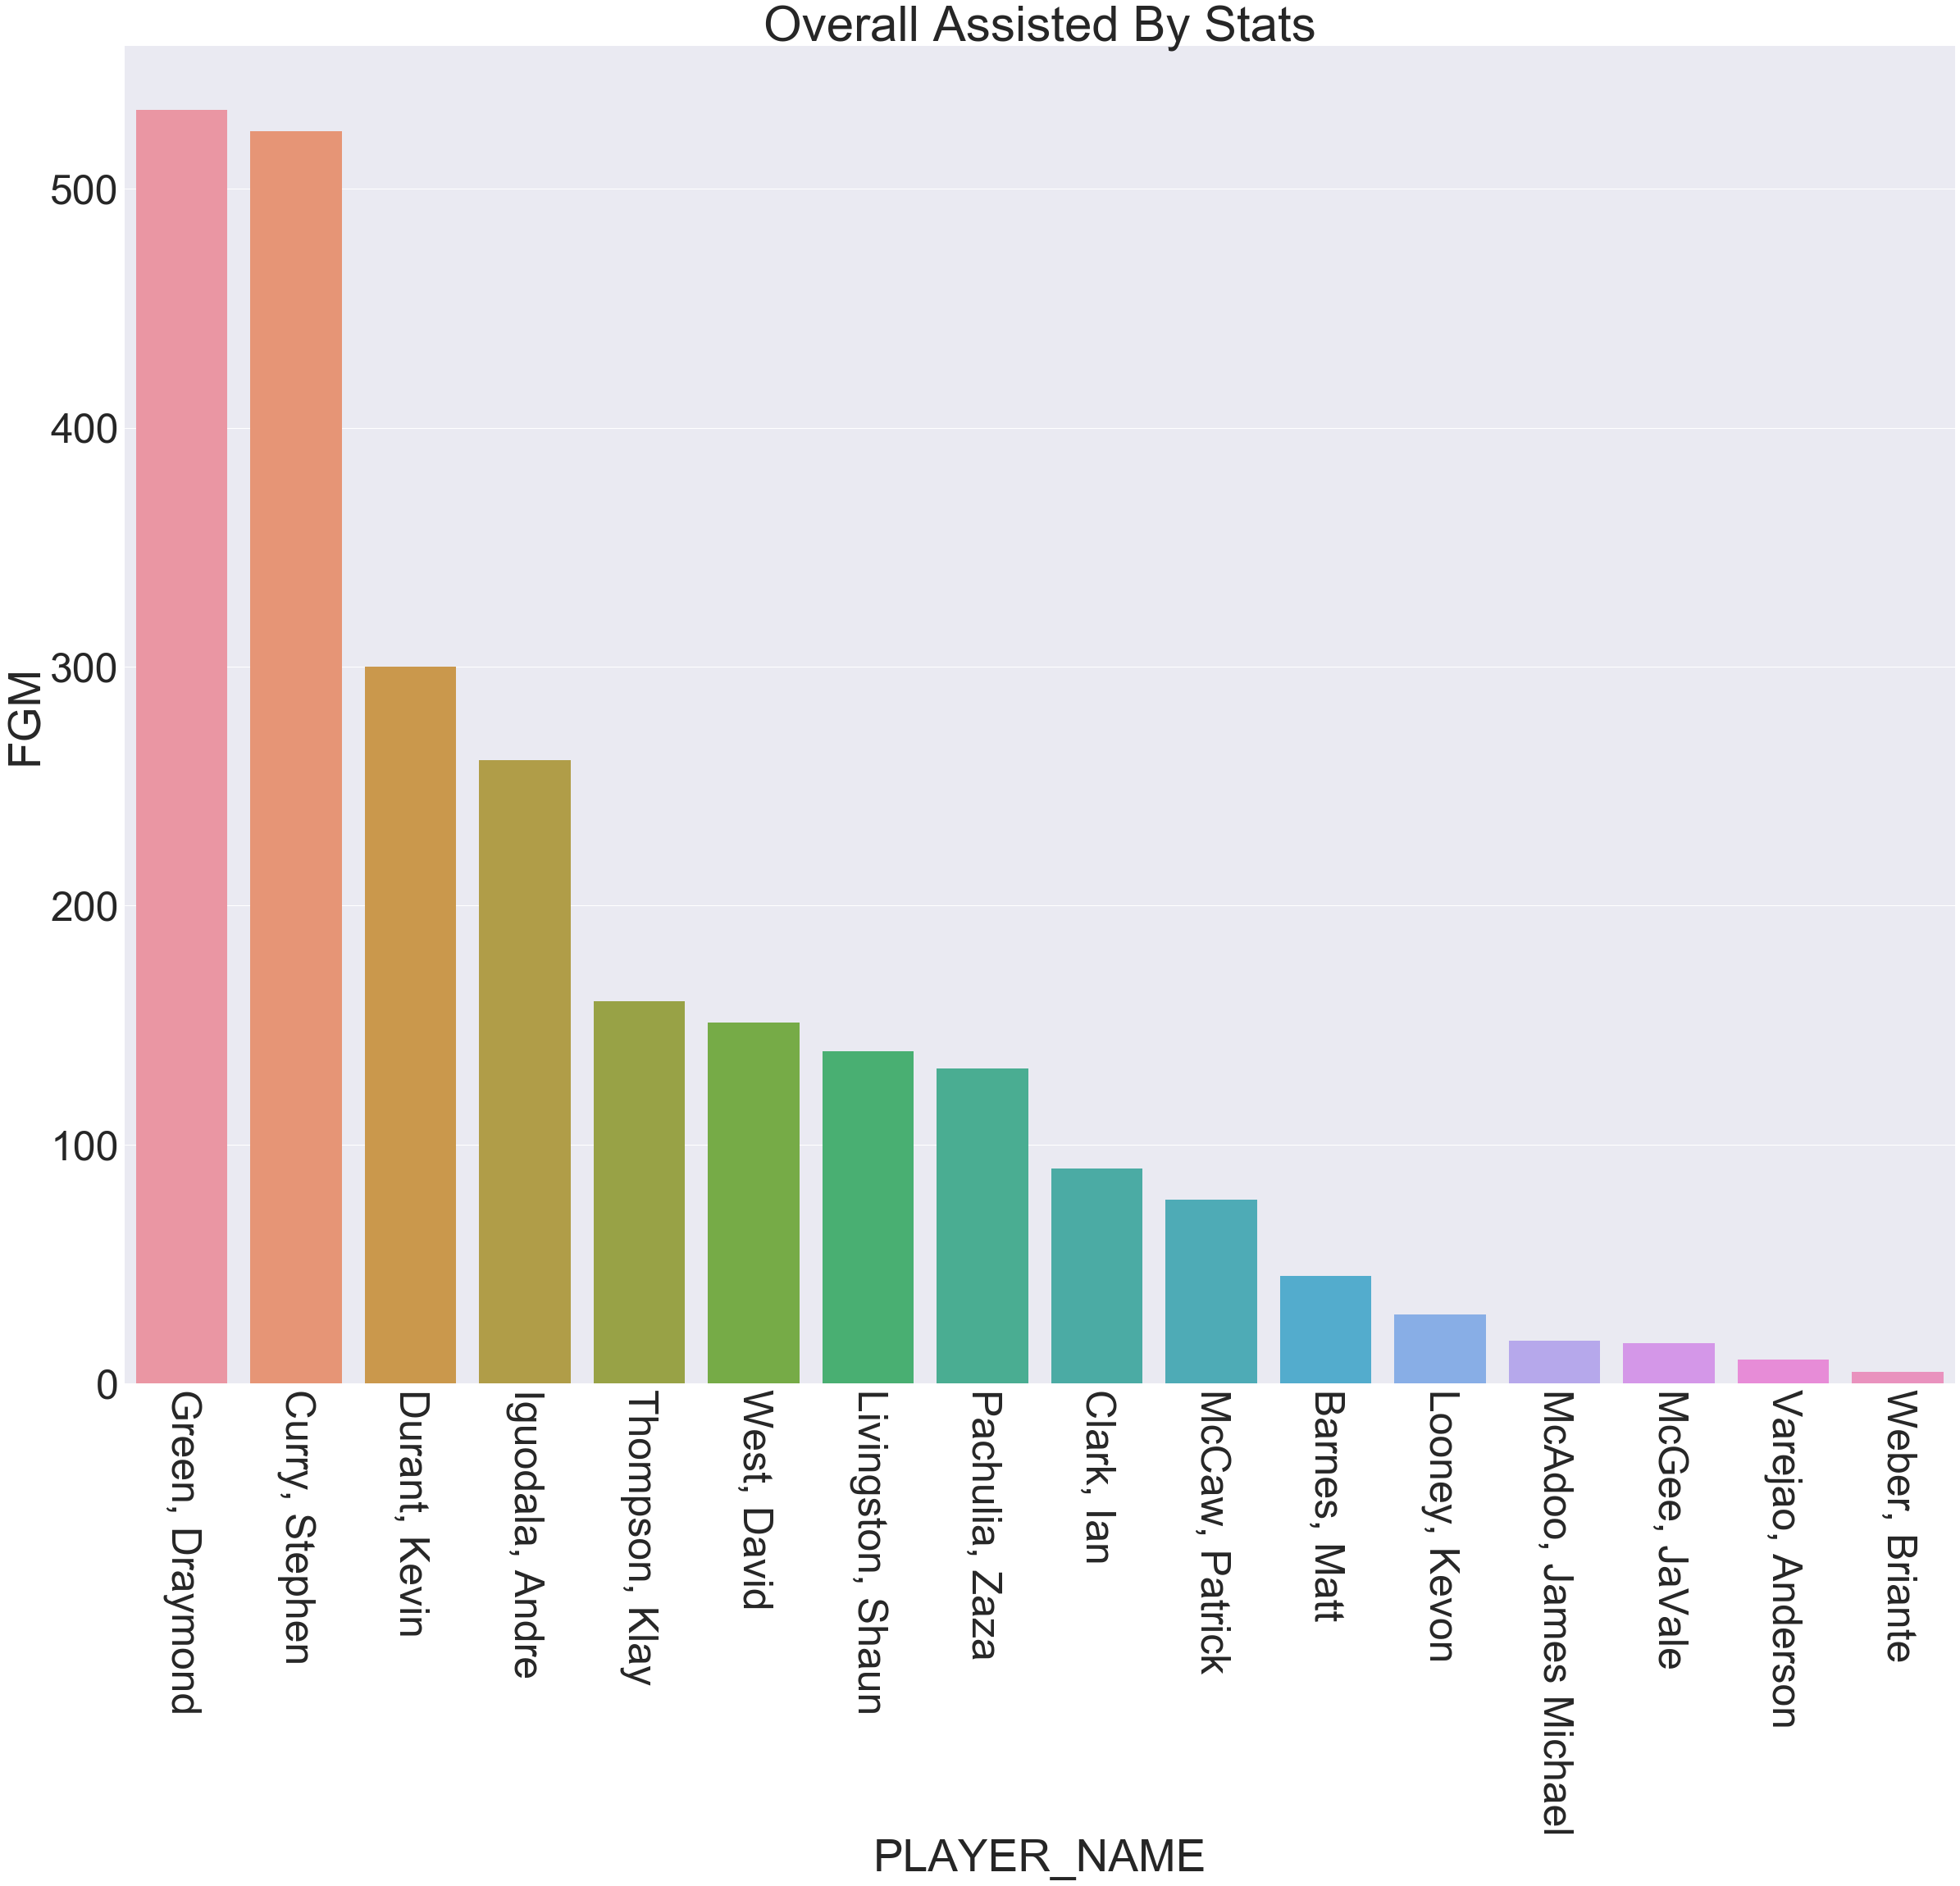

In [41]:
plt.rcParams['figure.figsize']=(40,30)
sns.set(font_scale=5)
plt.xticks(rotation=-90)
assist_overall = sns.barplot(x='PLAYER_NAME',y='FGM',data=test_assisted_by_df_sorted)
assist_overall.set_title('Overall Assisted By Stats')
#ax.set_title('Assisted By Stats', fontsize = 50)
#plt.rcParams["axes.labelsize"] = 100

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

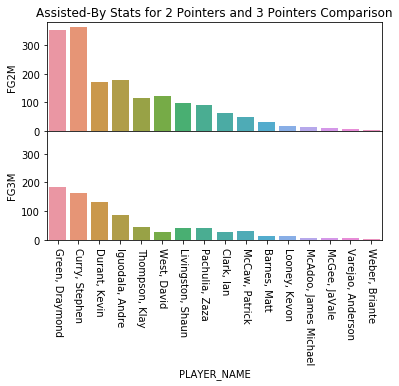

In [24]:
f, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=True)
sns.barplot(x='PLAYER_NAME',y='FG2M',data=test_assisted_by_df_sorted, ax=ax1)
sns.barplot(x='PLAYER_NAME',y='FG3M',data=test_assisted_by_df_sorted, ax=ax2)
ax1.set_title('Assisted-By Stats for 2 Pointers and 3 Pointers Comparison')
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
plt.xticks(rotation=-90)


In [22]:
gsw_shot_area_df

,GROUP_SET,GROUP_VALUE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,BLKA,...,EFG_PCT_RANK,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,CFID,CFPARAMS
0,Shot Area,Restricted Area,1559,2328,0.670,0,0,0.000,0.670,219,...,1,7,1,3,4,5,4,4,173,Restricted Area
1,Shot Area,In The Paint (Non-RA),353,807,0.437,0,0,0.000,0.437,58,...,6,6,3,1,4,5,6,2,173,In The Paint (Non-RA)
2,Shot Area,Mid-Range,638,1443,0.442,0,0,0.000,0.442,19,...,5,5,2,2,4,5,5,3,173,Mid-Range
3,Shot Area,Left Corner 3,111,258,0.430,111,258,0.430,0.645,2,...,2,2,4,4,1,4,1,7,173,Left Corner 3
4,Shot Area,Right Corner 3,114,289,0.394,114,289,0.394,0.592,3,...,3,3,4,4,2,3,2,6,173,Right Corner 3
5,Shot Area,Above the Break 3,755,1983,0.381,755,1983,0.381,0.571,12,...,4,4,4,4,3,2,3,5,173,Above the Break 3
6,Shot Area,Backcourt,1,31,0.032,1,31,0.032,0.048,0,...,7,1,4,4,4,1,7,1,173,Backcourt


In [23]:
gsw_shot_area_df.describe()

,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,BLKA,PCT_AST_2PM,PCT_UAST_2PM,...,FG3_PCT_RANK,EFG_PCT_RANK,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,CFID
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0
mean,504.428571,1019.857143,0.398000,140.142857,365.857143,0.176714,0.486429,44.714286,0.261857,0.166714,...,3.571429,4.000000,4.000000,3.142857,3.142857,3.142857,3.571429,4.000000,4.000000,173.0
std,544.110852,908.813958,0.188293,276.243509,724.151786,0.211237,0.213611,79.422319,0.331167,0.215042,...,1.618347,2.160247,2.160247,1.214986,1.214986,1.214986,1.618347,2.160247,2.160247,0.0
min,1.000000,31.000000,0.032000,0.000000,0.000000,0.000000,0.048000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,173.0
25%,112.500000,273.500000,0.387500,0.000000,0.000000,0.000000,0.439500,2.500000,0.000000,0.000000,...,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,173.0
50%,353.000000,807.000000,0.430000,1.000000,31.000000,0.032000,0.571000,12.000000,0.000000,0.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,173.0
75%,696.500000,1713.000000,0.439500,112.500000,273.500000,0.387500,0.618500,38.500000,0.563500,0.341500,...,5.000000,5.500000,5.500000,4.000000,4.000000,4.000000,5.000000,5.500000,5.500000,173.0
max,1559.000000,2328.000000,0.670000,755.000000,1983.000000,0.430000,0.670000,219.000000,0.706000,0.484000,...,5.000000,7.000000,7.000000,4.000000,4.000000,4.000000,5.000000,7.000000,7.000000,173.0
